#### Importing important librabries for preprocessing and EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

#### pandas is used to read the csv file
#### matplotlib.pyplot is used for plot histogram and boxplot
#### seaborn is used to plot pairplot and heatmap
#### The train_test_split is imported from sklearn.model_selection to split the dataset into training and testing dataset for the model to train and test

#### Importing dataset using pandas read_csv() function and displaying the first 5 entries using head()

In [2]:
dataset = pd.read_csv('60009200084, 60009210031_Dataset_spine.csv')
dataset.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


#### using  shape() function to diplay the no. of rows and columns in the dataset

In [3]:
dataset.shape

(310, 14)

#### Using remane() function to remname all the column names for a better understanding of the dataset

In [4]:
dataset.rename(columns = {"Col1":"pelvic_incidence", "Col2":"pelvic_tilt","Col3":"lumbar_lordosis_angle","Col4":"sacral_slope", "Col5":"pelvic_radius","Col6":"degree_spondylolisthesis", "Col7":"pelvic_slope","Col8":"direct_tilt","Col9":"thoracic_slope", "Col10":"cervical_tilt", "Col11":"sacrum_angle","Col12":"scoliosis_slope", "Class_att" : "class", "Unnamed: 13" :"Unnamed: 13"}, inplace=True)
dataset.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


#### Using function info() to get a overview/summary of the dataset such as datatype, not-null values in a column

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  class                     310 non-null    object 
 13  Unnamed: 13               14 non-null     object 
dtypes: float64

#### Using function describe() to find basic information in a dataset such as mean, standard deviation 

In [6]:
dataset.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


#### Using function isnull().sum() to find the sum of all null values in a column in the dataset

In [7]:
dataset.isnull().sum()

pelvic_incidence              0
pelvic_tilt                   0
lumbar_lordosis_angle         0
sacral_slope                  0
pelvic_radius                 0
degree_spondylolisthesis      0
pelvic_slope                  0
direct_tilt                   0
thoracic_slope                0
cervical_tilt                 0
sacrum_angle                  0
scoliosis_slope               0
class                         0
Unnamed: 13                 296
dtype: int64

In [8]:
dataset.iloc[:,-1:].head()

,Unnamed: 13
0,NaN
1,NaN
2,Prediction is done by using binary classificat...
3,NaN
4,NaN


#### Found an unnecessary column named 'Unnamed: 13' using iloc() function

#### using drop() to delete the unncessary column

In [9]:
dataset = dataset.drop(['Unnamed: 13'], axis = 1)

#### Using function value_counts() to find the number of all Abnormal and Normal values

In [10]:
dataset["class"].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

#### Bar plot of count of Abnormal and Normal values

<AxesSubplot:>

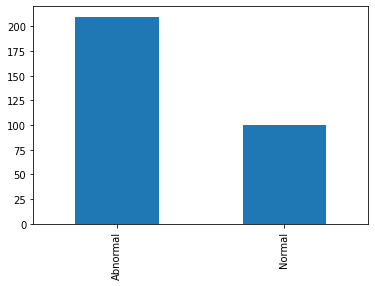

In [11]:
dataset["class"].value_counts().sort_index().plot.bar()

In [12]:
dataset.groupby('class').mean()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
class,,,,,,,,,,,,
Abnormal,64.692562,19.791111,55.925370,44.90145,115.077713,37.777705,0.483979,21.085875,12.948913,12.132737,-13.826677,25.146915
Normal,51.685244,12.821414,43.542605,38.86383,123.890834,2.186572,0.449880,21.816394,13.307268,11.514534,-14.528712,26.694019


#### Used groupby() and mean() function to find mean for each attribute that gives 'Abnormal' and 'Normal' value
#### Large difference exists between LBP and non-LBP
#### Pelvic_incidence
#### Pelvic_tilt -Lumbar_lordosis_angle -Scaral_slop-Pelvic_raidus -Degree_spondylolisthesis

<AxesSubplot:>

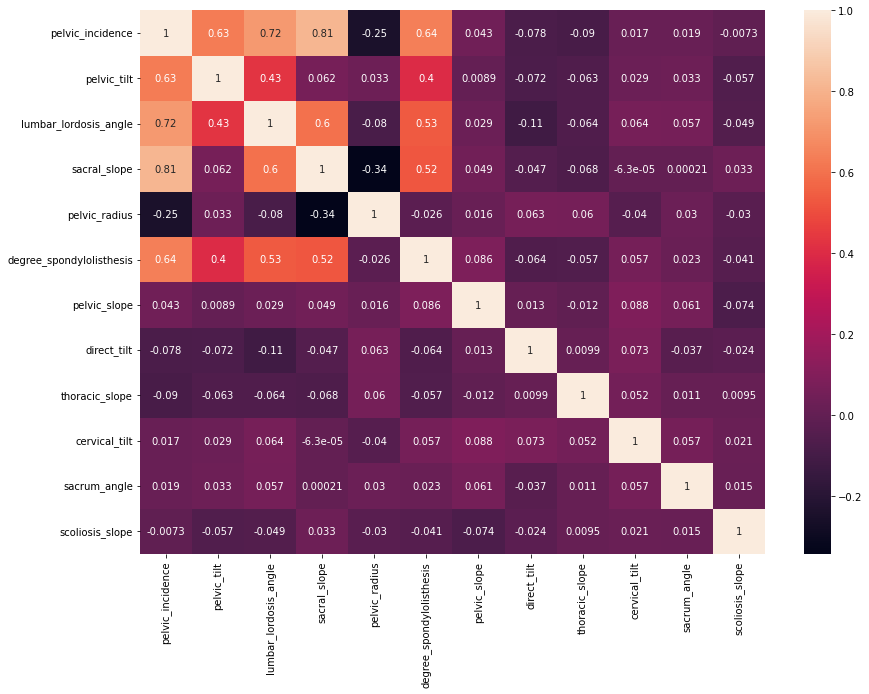

In [13]:
plt.subplots(figsize=(14,10))
sns.heatmap(dataset.corr(), annot=True)

#### Used corr() function with seaborn and matplolib libraries to plot correlation heatmap. Values closer to 1 the higher the correlation
#### Pelvic incidence is correlated with overall variables
#### pelvic_incidence is calculaed by summing pelivc_tilt and sacral slope. That is why there is a high correlation between them

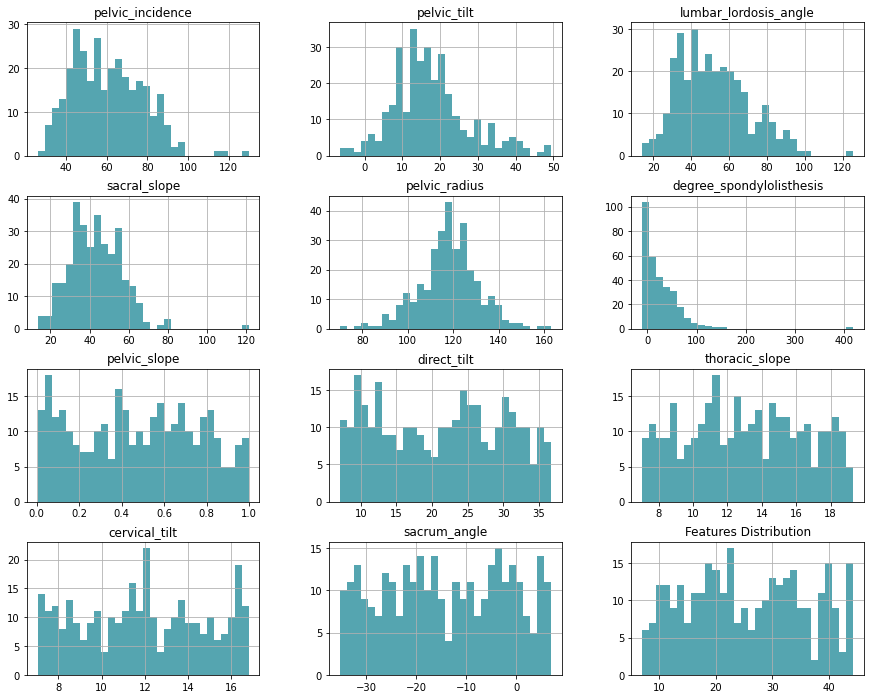

In [14]:
dataset.hist(figsize=(15,12),bins=30, color="#007989AA")
plt.title("Features Distribution")
plt.show()

#### Used hist() function to plot histogram and to show Feature distribution among the dataset

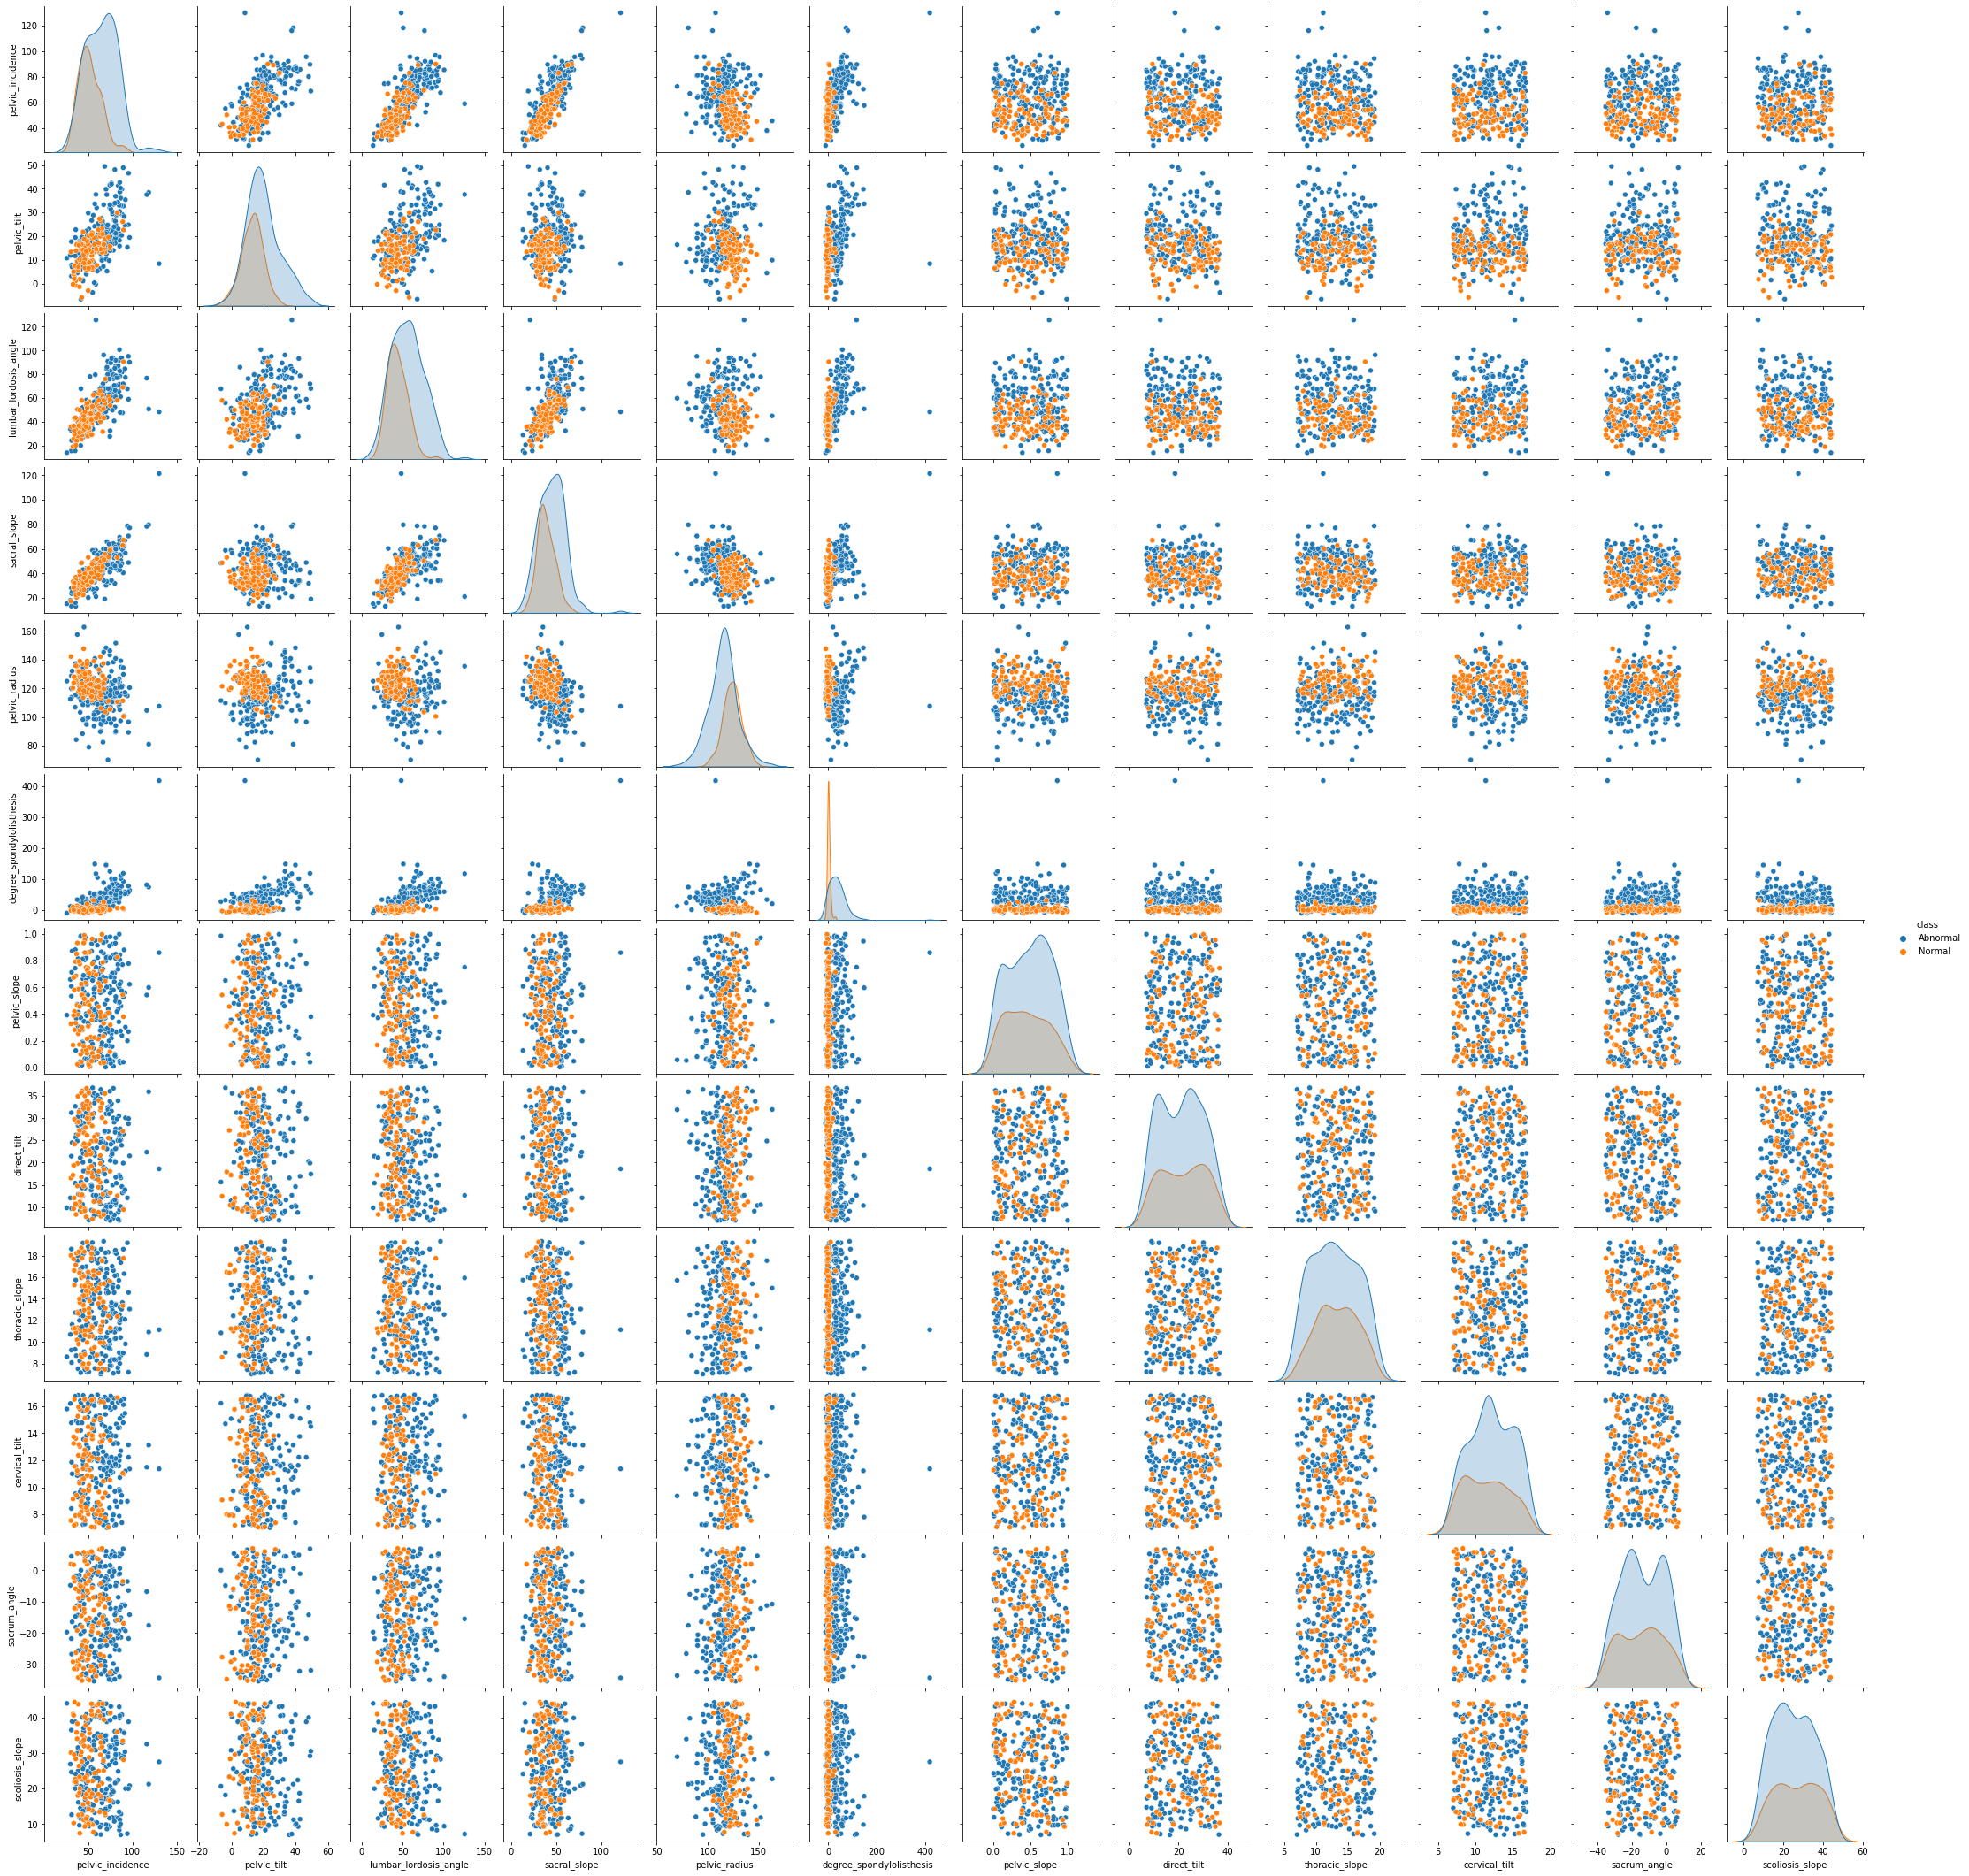

In [15]:
sns.pairplot(dataset, hue="class")

#### Used pairplot() function and seaborn library to plot pairwise relationships among the dataset

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, 'sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, 'cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

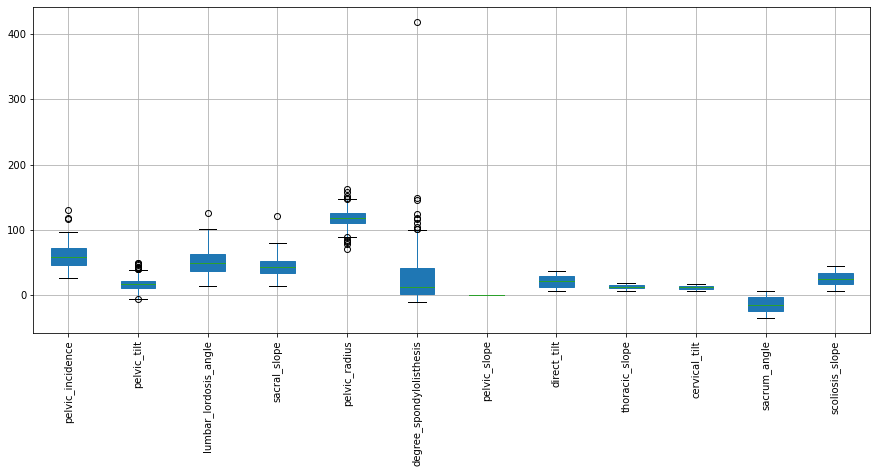

In [16]:
plt.subplots(figsize=(15,6))
dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)

#### Used boxplot() to find the outliers in the dataset. The points are the outliers which are detected

In [17]:
X = dataset.iloc[:, :-1]
def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    
    median = X[feature].median()
    
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median

for i in range(4):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

#### Inserted all the features columns in 'X' and defined a function remove_outlier to remove outliers in the dataset and used a for loop to use that function for all the columns

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'pelvic_incidence'),
  Text(2, 0, 'pelvic_tilt'),
  Text(3, 0, 'lumbar_lordosis_angle'),
  Text(4, 0, 'sacral_slope'),
  Text(5, 0, 'pelvic_radius'),
  Text(6, 0, 'degree_spondylolisthesis'),
  Text(7, 0, 'pelvic_slope'),
  Text(8, 0, 'direct_tilt'),
  Text(9, 0, 'thoracic_slope'),
  Text(10, 0, 'cervical_tilt'),
  Text(11, 0, 'sacrum_angle'),
  Text(12, 0, 'scoliosis_slope')])

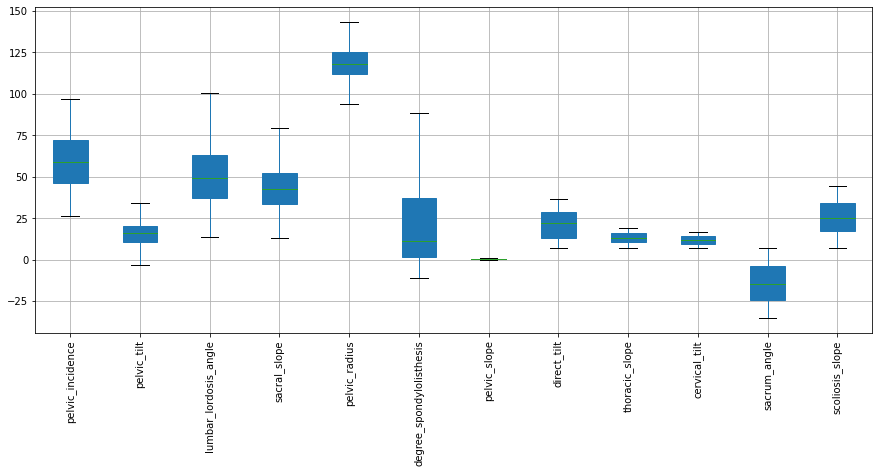

In [18]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True)
plt.xticks(rotation=90)

In [19]:
y = LabelEncoder().fit_transform(dataset["class"])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#### Used LabelEncoder() function to convert 'class' column from 'non-numeric' to 'numeric' and stored it in y so that we can build a prediction model as the prediction model does not take non-numeric values.
#### IN these above steps we divided the columns in 'X'(features) and 'y'(target values)

In [20]:
print(X.shape,y.shape)

(310, 12) (310,)


#### Displaying the shape for checking if all the steps are done correctly

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 25, stratify=y)

#### Splited 'X' and 'y' into 'X_train', 'X_test', 'y_train', 'y_test' with test size of 30% and train size of 70%

In [112]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Used StandScalar() function to standardize the dataset so that it will take lower amount of computation power when applying any classification model.
#### StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.

In [113]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(217, 12) (93, 12) (217,) (93,)


#### Final check using shape() function

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

Importing logistic regression , decision tree classifier, random forest classifier , and support vector classifier

In [231]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classification": SVC(kernel="linear"),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ' trained.')

Logistic Regression trained.
Decision Tree trained.
Random Forest trained.
Support Vector Classification trained.


Training our data with the help of logistic regression, Decision tree, Random Forest and SVC and checking everyones accuracy

In [232]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {acc * 100}')

Logistic Regression Accuracy: 83.87096774193549
Decision Tree Accuracy: 77.41935483870968
Random Forest Accuracy: 78.49462365591397
Support Vector Classification Accuracy: 83.87096774193549


In [233]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} F1-Score: {f1}')

Logistic Regression F1-Score: 0.761904761904762
Decision Tree F1-Score: 0.6440677966101694
Random Forest F1-Score: 0.6296296296296297
Support Vector Classification F1-Score: 0.7692307692307692


As the accuracy and the F1 Score of the SVC is maximum so we are choosing it as our model.

In [234]:
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8387096774193549

In [235]:
y_true = np.array(y_test) #expected
y_pred = model.predict(X_test) #predicted

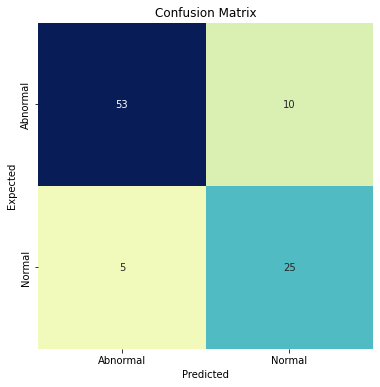

In [236]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))

sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False,cmap="YlGnBu", xticklabels=['Abnormal', 'Normal'], yticklabels=['Abnormal', 'Normal'])

plt.xlabel("Predicted")
plt.ylabel("Expected")
plt.title("Confusion Matrix")

plt.show()

In [237]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.88        63
           1       0.71      0.83      0.77        30

    accuracy                           0.84        93
   macro avg       0.81      0.84      0.82        93
weighted avg       0.85      0.84      0.84        93



In [238]:
model = SVC(kernel='linear', C=1)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1,error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.829 (0.057)


<AxesSubplot:>

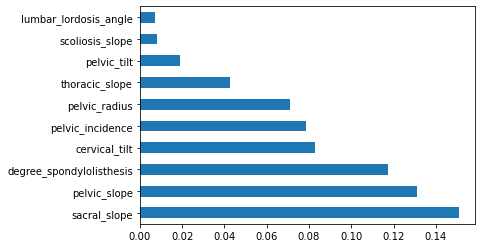

In [244]:
from matplotlib import pyplot as plt
from sklearn import svm

features_names = ['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','direct_tilt','thoracic_slope','cervical_tilt','sacrum_angle','scoliosis_slope']

svm = svm.SVC(kernel='linear')
svm.fit(X, y)

pd.Series(abs(svm.coef_[0]), index=features_names).nlargest(10).plot(kind='barh')
